In [1]:
from dataclasses import dataclass, asdict
from functools import partial

In [2]:
from ipynb.fs.full.quantumsystem import *

In [3]:
from ipynb.fs.full.MovementSystem import *

In [4]:
from ipynb.fs.full.DamageSystem import *

In [5]:
from ipynb.fs.full.WeaponsSystem import *

In [6]:
qs.quantum_system_name = "MechaCombatSystem"

In [7]:
class SizeSystem(QuantumSystem.System):
    pass

class TMMSystem(QuantumSystem.System):
    pass

In [8]:
class SpecialSystem(QuantumSystem.System):
    edge_name = "special"

In [9]:
class Faction(QuantumSystem.System):
    """ A unified group in the game """

In [10]:
class Structure(QuantumSystem.HyperSystem):
    systems = [XYLocation, Elevation, ArmorSystem, Faction]
    
    @classmethod
    def buildStructureFactory(cls, systemDefaults):
        return partial(
            cls.build_system,
            terminants=systemDefaults)

In [11]:
StructureFactories = {
    "Apartment Tower": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["4", "2"],  # Armor System
        "Unaligned"  # Faction System
    ]),
    "Foundry": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["8", "6"],  # Armor System
        "Unaligned"  # Faction System
    ]),
    "Factory": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["7", "5"],  # Armor System
        "Unaligned"  # Faction System
    ]),
    "Office Tower": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["5", "4"],  # Armor System
        "Unaligned"  # Faction System
    ]),
    "Warehouse": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["7", "4"],  # Armor System
        "Unaligned"  # Faction System
    ]),
    "Road": Structure.buildStructureFactory([
        json.dumps([0, 0]),  # XYLocation System
        5,  # Elevation System
        ["1", "0"],  # Armor System
        "Unaligned"  # Faction System
    ])
}

In [12]:
class MechTypeSystem(QuantumSystem.System):
    edge_name = "mech_type"

class MechModelSystem(QuantumSystem.System):
    edge_name = "mech_model"

class MechRoleSystem(QuantumSystem.System):
    edge_name = "mech_role"
    
class PointValueSystem(QuantumSystem.System):
    edge_name = "point_value"
    
class MechDefinitionSystem(QuantumSystem.HyperSystem):
    systems = [MechTypeSystem, MechModelSystem, MechRoleSystem, SizeSystem, TMMSystem, SpecialSystem, PointValueSystem]

In [13]:
class UnitSystem(QuantumSystem.HyperSystem):
    systems = [MoveSystem, Weapons, UnitDamageSystem, Faction]

class MechSystem(QuantumSystem.HyperSystem):
    systems = [UnitSystem, MechDefinitionSystem]
    
    @classmethod
    def buildMechFactory(cls, systemDefaults):
        def newMechFactory(mechName, faction):
            systemDefaults[0][3] = faction
            return cls.build_system(mechName, terminants=systemDefaults)
        return newMechFactory
    
@dataclass
class Mech(QuantumSystem.Entity):
    """ TODO """

In [14]:
MechFactories = {
    "Kingfisher Prime": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "8j"
            ],
            [  # Weapons System
                [["0", "6"]], [["2", "6"]], [["4", "3"]], "1", "3"
            ],
            [  # Unit Damage System
                ["9", "7"], ["1", "4", "4", "4"]
            ],
            "Unaligned"
        ],
        [  # Mech Definition System
            "BM", "Kingfisher Prime", "Brawler", "4", "1", json.dumps(["OMNI", "CASE", "IF01"]), "54"
        ]
    ]),
    "Atlas": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "6"
            ],
            [  # Weapons System
                [["0", "4"]], [["2", "4"]], [["4", "4"]], "1", "3"
            ],
            [  # Unit Damage System
                ["10", "8"], ["1", "4", "4", "4"]
            ],
            "Unaligned"
        ],
        [  # Mech Definition System
            "BM", "Atlas", "Juggernaut", "4", "1", json.dumps(["AC2", "IF1", "LRM1", "REAR2"]), "52"
        ]
    ]),
    "Huntsman": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "10j"
            ],
            [  # Weapons System
                [["0", "3"]], [["2", "3"]], [["4", "2"]], "3", "3"
            ],
            [  # Unit Damage System
                ["6", "3"], ["1", "4", "4", "4"]
            ],
            "Unaligned"
        ],
        [  # Mech Definition System
            "BM", "Huntsman", "Sniper", "2", "2", json.dumps(["OMNI", "CASE", "IF1", "FLK0"]), "37"
        ]
    ])
}

In [15]:
ObjectFactories = {**MechFactories, **StructureFactories}

Received: Cannot move unit further (15.066519173319364) than its movement speed (8)
Received: Movement relationship not found on Apartment


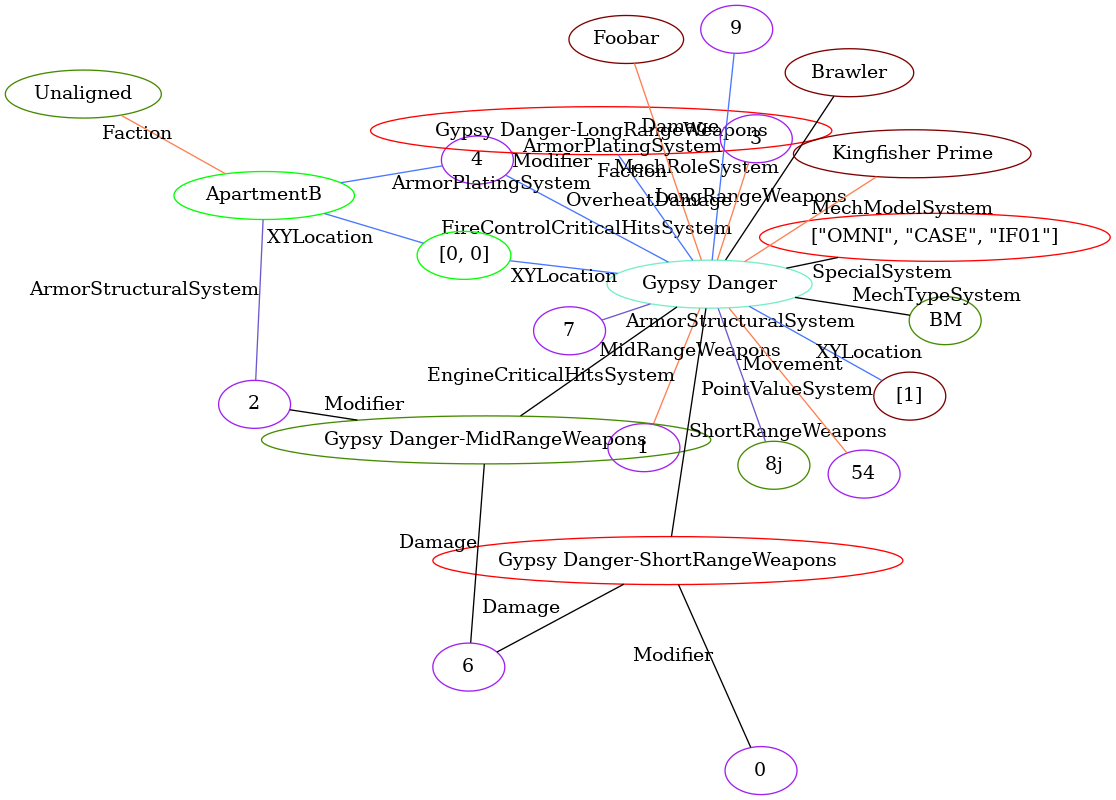

In [16]:
if __name__ == "__main__":
    qs.reset()
    MechFactories['Kingfisher Prime']("Gypsy Danger", "Foobar")
    MoveSystem.move("Gypsy Danger", [1, 1, 1])
    try:
        MoveSystem.move("Gypsy Danger", [15, 1, 1])
    except AssertionError as ae:
        print(f"Received: {ae}")
        
    try:
        MoveSystem.move("Apartment", [1, 0, 0])
    except Exception as e:
        print(f"Received: {e}")
    StructureFactories['Apartment Tower']('ApartmentB')
    from IPython.display import display
    display(qs.render())

In [ ]:
class GamePhase(QuantumSystem.System):
    """ The overall MechaCombat Game state is split into 4 phases: idle,
        calibrate, populate terrain, populate units, game rounds (alternating Move and Action phases), and completion. """
    @staticmethod
    def legalStates():
        return ["idle", "calibrate", "populate", "play"]

class PlayPhase(QuantumSystem.System):
    """ The Play Phase is defined as alternated rounds of "Move" and "Action" """
    @staticmethod
    def legalStates():
        return ["move", "action"]

class TeamPlay(QuantumSystem.System):
    """ Which Team Is Active"""
    

class RoundCount(QuantumSystem.System):
    """ Records the number of rounds since the game began """

In [ ]:
class GameState(QuantumSystem.HyperSystem):
    systems = [GamePhase, PlayPhase, RoundCount]

    @classmethod
    def build_system(cls, terminants=None):
        if terminants is None:
            terminants = ["idle", "move", '0']
        for system, terminant in zip(cls.systems, terminants):
            system.build_system(cls.__name__, terminant)
        return cls.__name__
    
    @classmethod
    def nextPhase(cls):
        return GamePhase.get_relationship(cls.__name__)

    @classmethod
    def setPhase(cls, newPhase):
        assert newPhase in GamePhase.legalStates()
        phase = GamePhase.get_relationship(cls.__name__)
        QuantumSystem.replace(cls.__name__, GamePhase, phase, newPhase)

    @classmethod
    def setPhaseCalibrate(cls):
        cls.setPhase("calibrate")

    @classmethod
    def setPhasePopulate(cls):
        cls.setPhase("populate")

    @classmethod
    def setPhasePlay(cls):
        cls.setPhase("play")

    @classmethod
    def setPlayPhase(cls, newPhase):
        assert newPhase in PlayPhase.legalStates()
        phase = PlayPhase.get_relationship(cls.__name__)
        QuantumSystem.replace(cls.__name__, PlayPhase, phase, newPhase)

In [ ]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()

    # Power up game
    GameState.build_system()

    # Player presses new game button (Add and annotate)
    display(qs.render())
    GameState.setPhasePopulate()

    # Player presses "start" button
    GameState.setTeamPlay("Team0")
    GameState.setPlayPhase("move")
    GameState.setPhasePlay()

    GameState.addEvent(("Move", "Team0", "Gypsy Danger", "[1, 2, 3]"))

    # All units from Team 0 move or pass
    GameState.setTeamPlay("Team1")

    GameState.addEvent(("Move", "Team1", "Knifehead", "[1, 2, 3]"))

    # All units from Team 1 move or pass
    GameState.setTeamPlay("Team0")
    GameState.setPlayPhase("action")

    GameState.addEvent(("Attack", "Team0", "Gypsy Danger", "Knifehead"))

    # All units from Team 0 take action or pass
    GameState.setTeamPlay("Team1")

    GameState.addEvent(("Attack", "Team1", "Knifehead", "Gypsy Danger"))

    # All units from Team 1 take action or pass
    GameState.setTeamPlay("Team0")
    GameState.setPlayPhase("move")

    display(qs.render())